# [範例重點]
- 直接列出的觀察方式 (In[3], Out[3])
- 出現異常數值的資料調整方式 (In[4])
- 散佈圖異常與其調整方式 (Out[5], In[6], Out[6])

In [6]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [7]:
# 讀取 csv 資料檔, 並觀察前幾筆資料 ( .head() )
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 觀察聘雇天數 'DAYS_EMPLOYED' 內的數值
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [10]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]

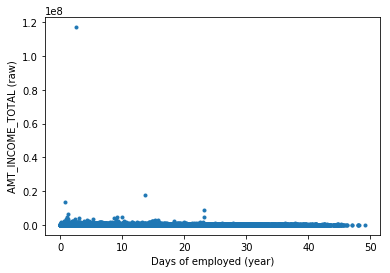

Correclation: 0.0130


In [17]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED']/(-365), sub_df['AMT_INCOME_TOTAL'])
print("Correclation: %.4f" % (corr[0][1]))

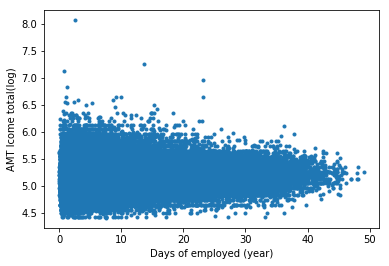

In [18]:
plt.plot(sub_df['DAYS_EMPLOYED']/(-365), np.log10(sub_df['AMT_INCOME_TOTAL']), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT Icome total(log)')
plt.show()

In [20]:
corr = np.corrcoef(sub_df['DAYS_EMPLOYED']/(-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correclation: %.4f" % (corr[0][1]))

Correclation: 0.0380


#使用Panda

In [26]:
dfDaysBirth = app_train['DAYS_BIRTH'] 
dfDaysBirth.sort_values()

265026   -25229
124430   -25201
63316    -25201
143266   -25200
130108   -25197
169562   -25197
173470   -25196
282013   -25196
226213   -25196
169823   -25196
79852    -25195
172581   -25192
276202   -25192
140738   -25191
271258   -25187
65237    -25186
49288    -25184
20863    -25182
119085   -25180
130865   -25179
187478   -25177
216470   -25176
228384   -25175
282656   -25175
76783    -25173
164069   -25170
274276   -25170
298564   -25170
263141   -25169
238181   -25168
          ...  
74216     -7688
90584     -7688
37558     -7687
271897    -7687
58541     -7687
269022    -7686
50995     -7685
233741    -7684
169219    -7684
114779    -7683
35956     -7683
186834    -7683
170882    -7682
224890    -7681
80769     -7681
48401     -7680
65419     -7680
73870     -7680
249615    -7680
183033    -7680
124856    -7680
19115     -7680
139090    -7679
220805    -7678
173803    -7678
137182    -7678
170384    -7676
53702     -7676
168135    -7673
235444    -7489
Name: DAYS_BIRTH, Length

In [28]:
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

0.07823930830982712

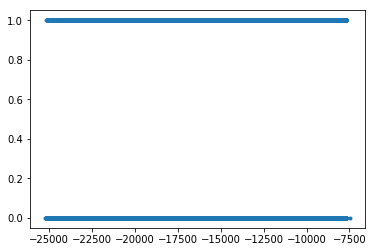

In [31]:
#客戶年紀與target有正相關,但劃出scatter plot 看不出來
plt.plot(app_train['DAYS_BIRTH'], app_train['TARGET'], '.')

Text(0.5, 0.98, 'Birth v.s Target')

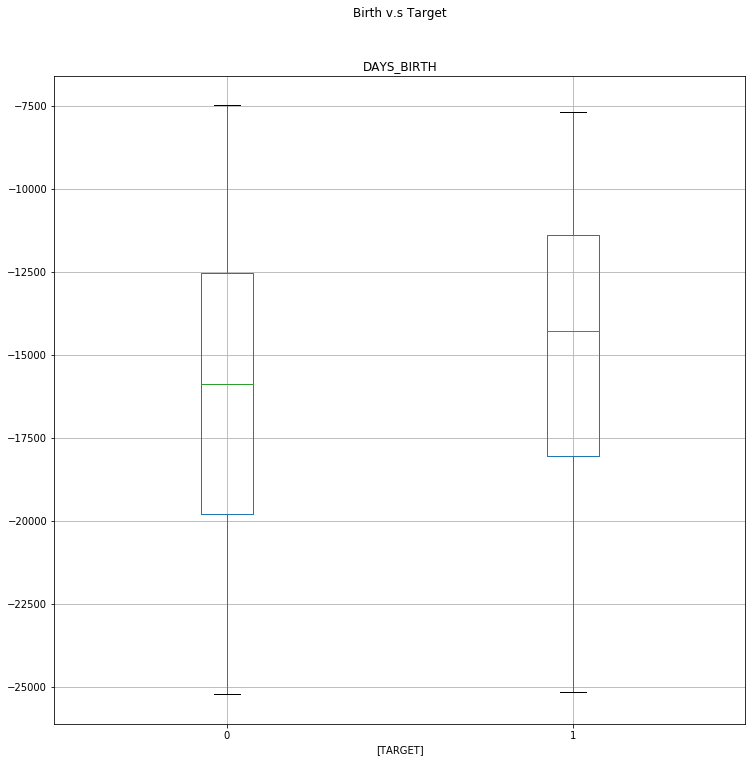

In [33]:
#改畫 boxplot
plt_column = ['DAYS_BIRTH']
plt_by =  ['TARGET']
app_train.boxplot(column = plt_column, by = plt_by, showfliers = False, figsize = (12,12))
plt.suptitle('Birth v.s Target')